<a href="https://colab.research.google.com/github/jyothikapotnuru/Project/blob/main/xgboostregressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving lithium-ion batteries.csv to lithium-ion batteries.csv


Initial Shape: (339, 11)
After Cleaning Shape: (339, 10)

Model Evaluation Results:
Mean Absolute Error (MAE): 0.5195319142972723
R² Score: 0.5342733481439109

Feature Importance:
                 Feature  Importance
1      E Above Hull (eV)    0.189006
3        Density (gm/cc)    0.165472
0  Formation Energy (eV)    0.160236
5         Crystal System    0.151174
2                 Nsites    0.137412
6             Spacegroup    0.101796
4                 Volume    0.094904


/tmp/ipython-input-2572320957.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Crystal System"] = le1.fit_transform(X["Crystal System"])
/tmp/ipython-input-2572320957.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Spacegroup"] = le2.fit_transform(X["Spacegroup"])


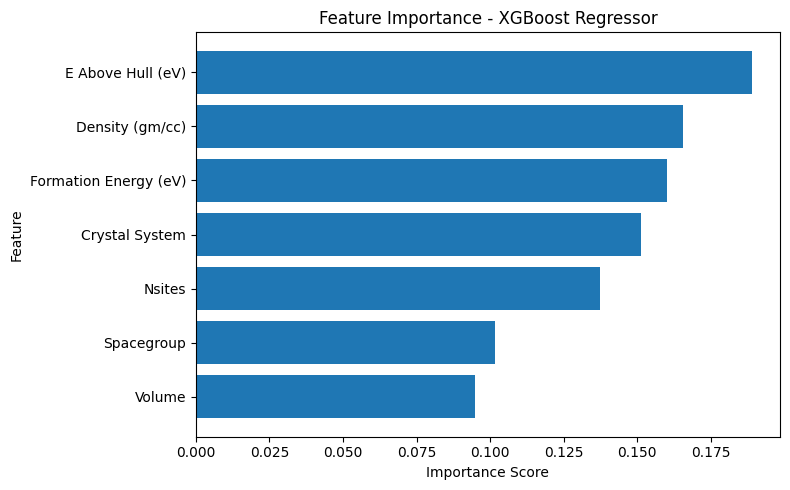

In [ ]:
# Program.py

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# -------------------------------
# Step 1: Load Dataset
# -------------------------------
df = pd.read_csv("lithium-ion batteries.csv")

# -------------------------------
# Step 2: Basic Data Cleaning
# -------------------------------
print("Initial Shape:", df.shape)

# Remove duplicate rows if any
df = df.drop_duplicates()

# Remove rows with missing (NaN) values
df = df.dropna()

# Remove any non-numeric values or incorrect entries
df = df.select_dtypes(include=["float64", "int64", "object"])

print("After Cleaning Shape:", df.shape)

# -------------------------------
# Step 3: Define Features (X) and Target (y)
# -------------------------------
X = df[["Formation Energy (eV)", "E Above Hull (eV)", "Nsites",
        "Density (gm/cc)", "Volume", "Crystal System", "Spacegroup"]]
y = df["Band Gap (eV)"]

# -------------------------------
# Step 4: Encode Categorical Columns
# -------------------------------
le1 = LabelEncoder()
le2 = LabelEncoder()
X["Crystal System"] = le1.fit_transform(X["Crystal System"])
X["Spacegroup"] = le2.fit_transform(X["Spacegroup"])

# -------------------------------
# Step 5: Split into Train and Test
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------
# Step 6: Feature Scaling
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# Step 7: Train XGBoost Regressor
# -------------------------------
model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train_scaled, y_train)

# -------------------------------
# Step 8: Evaluate Model
# -------------------------------
y_pred = model.predict(X_test_scaled)

print("\nModel Evaluation Results:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# -------------------------------
# Step 9: Feature Importance
# -------------------------------
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(importance_df)

# -------------------------------
# Step 10: Plot Feature Importance
# -------------------------------
plt.figure(figsize=(8,5))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance - XGBoost Regressor')
plt.tight_layout()
plt.show()
